# Introducción

En el curso de hoy comenzaremos a trabajar con Pandas, la librería más utilizada en el mundo Python para el análisis de datos y el manejo de DataFrames.


# Primeros pasos

El primer y más importante paso es importar la librería Pandas para poder utilizarla en nuestro código.
Siempre encontrarás que se abrevia utilizando el nombre 'pd' al importarla.

In [ ]:
import pandas as pd

Recuerda que para importar una librería en Python debes tenerla instalada. En el caso de los Colab no es necesario, pero si trabajaras en local puedes instalar Pandas así:
> pip install pandas

Es importante tener siempre a mano la documentación oficial de Pandas, será un gran aliado a la hora de entender y descubrir todas las opciones que nos permite:

https://pandas.pydata.org/docs/index.html

Recuerda comprobar siempre que la versión que estés utilizando corresponde a la que consultes en la documentación. Puedes comprobar tu versión desde Python ejecutando:

In [ ]:
print(pd.__version__)

#Series

Por un lado tenemos las Series.
Una Serie de Pandas es como una columna en una tabla.
Es una matriz unidimensional que contiene datos de cualquier tipo.
Contiene un array de datos y un array de etiquetas que van asociadas a los datos, llamado índice (index).

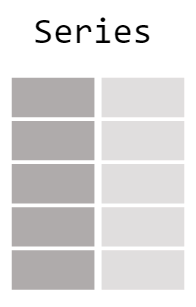

Podemos crear un objeto Series a partir de un array o de diccionarios del siguiente modo:


In [ ]:
# Usando arrays. Si no introducimos nosotros etiquetas para los datos el índice se autogenera.
nums = pd.Series ([10, 20, 16])
nums

In [ ]:
# Usando arrays con etiquetas. Tiene mas sentido.
ventas = pd.Series ([10, 20, 16], index = ['Enero', 'Febrero', 'Marzo'])
ventas

In [ ]:
# Usando diccionarios
dict_ventas = {"Enero": 10, "Febrero": 20, "Marzo": 16}

ventas = pd.Series(dict_ventas)
ventas

# Dataframes

Los dataframes es el tipo de estructura de datos más importante en Pandas. Si las Series son como una columna, podemos pensar en los DataFrame como una tabla o matriz, que estará formada por N filas y M columnas.

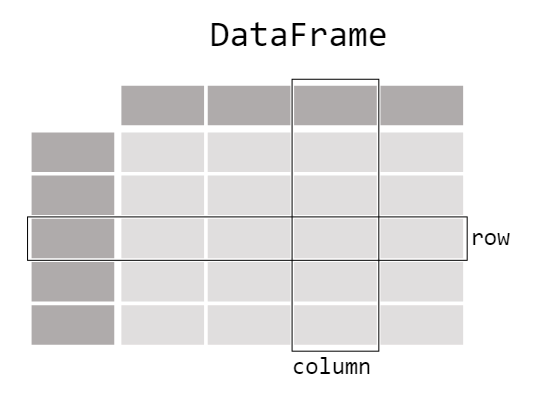

Pandas también nos permite crear DataFrames. Solo necesitamos introducir los datos. Para ello hay varias opciones:


In [ ]:
#Introducimos los datos de cada fila
mi_tabla =  pd.DataFrame( [[50, "María"], [31, "Juan"], [18, "Silvia"]])
mi_tabla

In [ ]:
#Podemos darle nombre a las columnas con el parametro "columns"
pd.DataFrame( [[50, "María"], [31, "Juan"], [18, "Silvia"]], columns=["Edad", "Nombre"])

In [ ]:
#Es más típico crearlo con un diccionario, ya que nos permite directamente indicar también el nombre de las columnas.
dict_data = {
    "Edad":[50,31,18],
    "Nombre": ["María", "Juan", "Silvia"]
    }

pd.DataFrame(dict_data)

# Entendiendo el Index

Los DataFrames de Pandas tienen un campo llamado Index, que facilita el acceder a los datos de una manera más fácil. También permite dar un nombre a cada fila, lo que facilita el trabajar con el DataFrame.


Veréis que al no hacerlo en los ejemplos anteriores, se creó un Index 0,1,2... para cada fila del dataframe automáticamente, mientras que en el ejemplo siguiente cada fila toma la etiqueta o nombre que nosotros le indicamos utilizando el parámetro *index* al crear nuestro DataFrame.

In [ ]:
clientes = pd.DataFrame( {"Edad":[50,31,18], "Nombre": ["María", "Juan", "Silvia"]}, index=["Cliente1", "Cliente2", "Cliente3"])
clientes

In [ ]:
# Podemos consultar el índice con el siguiente atributo del DataFrame
clientes.index

# dtypes
Las Series y las columnas de los DataFrames tienen tipos de datos, y dependiendo de esto se pueden realizar unas operaciones u otras sobre ellas.
Para conocer el tipo de datos de las columnas de un DataFrame podemos utilizar la propiedad *dtypes*:

In [ ]:
# Pandas trata los strings (cadenas de caracteres) como tipo object
clientes.dtypes

#Leyendo datos de un fichero

Lo más habitual es tener los datos en un fichero en el ordenador o un sistema externo. Para leer datos y guardarlos en un DataFrame, una forma fácil es utilizar la función *read_csv* de pandas, lo que nos permite leer un fichero CSV, ya esté en local o en una URL.

Para ello solo tenemos que indicarle donde está el fichero. En este caso, lo leeremos de una ruta pública de GitHub.

In [ ]:
url_fichero = "https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/customers.csv"
customers = pd.read_csv(url_fichero)

customers

In [ ]:
# Podemos darle a cada fila el nombre del valor customer_id utilizandolo como index. Al ser un valor único, nos será muy útil.
# Utilizaremos la función set_index()
customers.set_index("Customer_ID", inplace=True)

customers.head()

In [ ]:
customers.index

¿Por qué hemos incluido el parámetro `inplace=True`?

En general, las operaciones que realizamos sobre los DataFrame dan como resultado un nuevo DataFrame. Si queremos aplicar un cambio sobre el mismo DataFrame podemos utilizar el parámetro `inplace=True` disponible en muchas de las funciones de Pandas.

In [ ]:
# Leémos de nuevo el fichero antes de probar
customers = pd.read_csv(url_fichero)

# Sin el parámetro inplace no se modifica el DataFrame original
customers.set_index("Customer_ID")
customers.head()

Otra alternativa es asignar el resultado a la misma variable como en el siguiente ejemplo, suele ser la opción más habitual ya que evita errores en el código respecto a lo que queremos hacer:

In [ ]:
customers = customers.set_index("Customer_ID")
customers.head()

La función **read_csv** tiene muchos más argumentos que nos permiten hacer múltiples acciones a la hora de leer el archivo.

Por ejemplo podemos indicar el separador de cada línea del fichero con "sep", pero hay muchos otras opciones que podemos consultar en la[ documentación oficial.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)


In [ ]:
#Si tuvieramos un fichero en nuestro ordenador, tendríamos que pasarle la ruta del archivo.
#Por ejemplo, si lo tenemos en el colab porque lo hemos subido a mano, o si utilizamos los datos de ejemplo de la carpeta sample_data
data = pd.read_csv("sample_data/california_housing_train.csv", sep=',')
data.head()

Pandas soporta múltiples formatos de ficheros o fuentes de datos de serie (csv, excel, json, parquet, sql…). Encontrarás funciones para cada uno de ellos con el prefijo **read_***, read_excel, read_json...

#Leyendo datos de una base de datos
Python, y concretamente Pandas nos permite conectarnos a una base de datos y ejecutar código SQL para recuperar datos y guardarlos en un DataFrame.

Para este ejemplo, utilizaremos la libreria sqlite que creará una pequeña base de datos a la que nos podremos conectar.

In [ ]:
####################  ESTE TROZO DE CÓDIGO NOS CREARÁ UNA PEQUEÑA BASE DE DATOS PARA UTILIZAR DE EJEMPLO. ####
####################   NO ES NECESARIO QUE LO APRENDAIS, SOLO EJECUTARLO UNA VEZ                          ####
# Importamos SQLite
import sqlite3
# conectamos a la BD
db_con = sqlite3.connect(r'database.db')
# Leemos todos los csvs
c = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/customers.csv")
o = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/orders.csv")
r = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/returns.csv")
p = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/products.csv")
# Escribimos los csvs como tablas en la base de datos.
c.to_sql('customers', db_con, if_exists='replace', index=False)
o.to_sql('orders', db_con, if_exists='replace', index=False)
r.to_sql('returns', db_con, if_exists='replace', index=False)
p.to_sql('products', db_con, if_exists='replace', index=False)

#Cerramos la conexion.
db_con.close()

In [ ]:
#Para conectarse a una base de datos necesitamos primero saber donde se encuentra (la dirección del servidor), y normalmente usuario y contraseña.
#En esta ocasion nos basta con ejecutar la siguiente línea.
db_con = sqlite3.connect(r'database.db')


In [ ]:
#Con la función read_sql de pandas podemos introducir código SQL y extraer datos de una base de datos.
#Solo necesitamos introducir dos argumentos: la consulta SQL, y la conexión a la base de datos.
orders = pd.read_sql("SELECT * FROM orders", db_con)
orders.head()

In [ ]:
products = pd.read_sql("SELECT * FROM products", db_con)
products.head()

Recordad de la clase de SQL que podemos mezclar tablas con JOIN, para aprovechar y traernos ya los datos mezclados en un mismo dataframe. Vamos a hacer un join de las 2 tablas anteriores utilizando la columna Product_ID presente en ambas:

In [ ]:
order_and_products = pd.read_sql("SELECT * FROM orders JOIN products ON orders.Product_ID = products.Product_ID", db_con)
order_and_products.head()

Ya sabemos conseguir datos de 3 maneras diferentes:


1.   Creando un dataframe por nosotros mismos
2.   Leyendo de ficheros CSV
3.   Conectandonos a una base de datos y ejecutando código SQL para traernos el resultado.



# Ejercicio 1

Dirígete al notebook de ejercicios y realiza el ejercicio 1.

# Ejercicio 2

Dirígete al notebook de ejercicios y realiza el ejercicio 2.

# Accediendo y manejando los DataFrames

En esta sección veremos las formas más comunes de tratar con un DataFrame. Como obervamos su estructura, como accedemos a las diferentes columnas y filas y cómo se utiliza el index.

Primero vamos a obtener algo de información acerca del DataFrame. Para ello podemos utilizar diferentes herramientas.

In [ ]:
#esta funcion nos indica cuantas filas y columnas tiene nuestro dataframe
products.shape

In [ ]:
#la funcion len() de python nos devuelve la longitud de objetos, arrays, y tambien de DataFrames
len(products)

In [ ]:
# Podemos acceder a las primeras filas utilizando la función head()
products.head(7)

In [ ]:
# También podemos utilizar la función tail() para acceder al final
products.tail(10)

In [ ]:
# Incluso podemos obtener una muestra aleatoria con sample()
products.sample(10)

In [ ]:
# Para obtener información técnica acerca del DataFrame podemos usar la función info()
products.info()

In [ ]:
# Podemos recuperar una columna escribiendo dataframe.nombrecolumna
products.Product_Name

In [ ]:
products.Price

In [ ]:
#También podemos hacerlo de de esta forma
products["Product_Name"]

In [ ]:
# Cuando recuperamos una única columna, el resultado obtenido es una Serie
type(products["Product_Name"])

In [ ]:
# si queremos recuperar varias columnas podemos hacerlo utilizando una lista de valores
customers = pd.read_sql("SELECT * FROM customers", db_con)
customers[["Customer_Name", "Region"]]

In [ ]:
customers

In [ ]:
#Para acceder a una fila segun su posición en el dataframe utilizaremos iloc
customers.iloc[12]

In [ ]:
# Para acceder a un rango de filas separaremos las posiciones con dos puntos :
customers.iloc[12:560]

In [ ]:
#Si lo que queremos es acceder a una columna también por su posición, lo haremos indicando que queremos todas las filas con : y la posicion de la columna deseada.
#Así seleccionamos la columna Customer_Name, que se encuentra en la segunda posición
customers.iloc[:, 1]

In [ ]:
# Podemos jugar con : de manera muy cómoda, tanto para seleccionar más de una fila coomo mas de una columna.
# Los números negativos se refieren a los últimos índices. Por ejemplo para recuperar las últimas 5 filas
customers.iloc[-5:]

#Ejecutar estas sentencias para comprobar  los resultados.
#customers.iloc[10:15, 1]
#customers.iloc[10:, 1:5]
#customers.iloc[:, [1, 5]]
#customers.iloc[:, 1:]
#customers.iloc[-5:]

In [ ]:
customers.tail()

In [ ]:
#Con iloc accedemos a los elementos basandonos en su posición, pero con loc lo hacemos basándonos en su Nombre/Etiqueta/Index
customers.loc[788]  #con esta sentencia conseguimos la fila con índice 788

In [ ]:
#Podemos conseguir también la columna Country por su nombre.
customers.loc[:, "Country"]


In [ ]:
customers.loc[:, ["Country", "Region"]] #podemos conseguir más de una columna a la vez

¿Recordáis que al leer de un archivo podíamos indicar la columna que serviría como Index?

In [ ]:
customers = pd.read_sql("SELECT * FROM customers", db_con)

customers = customers.set_index(["Customer_ID"])

customers.head()

In [ ]:
#Y ahora .loc cobra mucho más sentido... Podemos encontrar filas por el ID de cliente.
customers.loc["SM-20320"]

In [ ]:
# Podemos también encontrar listas de filas y columnas a la vez:
customers.loc[["SM-20320", "SW-20245"], ["Customer_Name", "Country"]]

#Acceso condicional para filtrar
Hasta ahora hemos aprendido lo básico para acceder a diferentes filas y columnas de un dataset. En esta sección aprenderemos como filtrar filas basándonos en los valores que contienen.

In [ ]:
# Si aplicamos una condición sobre una columna vereis que nos devuelve True o False para cada fila si cumple o no la condición.
customers.Region == "West"

In [ ]:
customers.Region

In [ ]:
#Si pasamos el anterior trozo de código a loc, nos devolverá las filas que cumplen la condición.
customers.loc[customers.Region=="West"]

In [ ]:
#Podemos combinar y crear condiciones tan compllicadas como necesitemos con & (and) y | (or)
customers.loc[ (customers["Region"]=="West") & (customers.Segment=="Consumer")]

Existen varias funciones que nos facilitan la vida a la hora de seleccionar filas.



*   isin nos permite especificar más de un valor válido
*   notnull nos permite seleccionar las filas que no tengan valores nulos



In [ ]:
# para seleccionar todas las filas cuyo valor de Segment cumpla uno de estos dos valores
customers.loc[ customers["Segment"].isin(["Consumer", "Corporate"]) ]

In [ ]:
# podemos hacer la inversa añadiendo == False
customers.loc[customers["Segment"].isin(["Consumer", "Corporate"])==False]

In [ ]:
#Otra opción es negar con el símolo ~ delante.
customers.loc[~customers["Segment"].isin(["Consumer", "Corporate"])]

In [ ]:
#todas las filas cuya region no sea null
customers.loc[customers["Region"].notnull()]

# Asignando valores y creando nuevas columnas
Hasta ahora hemos aprendido como juguetear con los datos que hemos leído. En esta seccion aprenderemos como creamos nuevas columnas para ir aumentando y enriqueciendo nuestro DataFrame.



Podemos asignar un valor igual a todas las filas del DataFrame de una manera muy sencilla. En ocasiones queremos añadir una columna nueva que contenga un valor.

In [ ]:
customers.columns

In [ ]:
customers["Tienda"] = "Amazon"
customers

En otras ocasiones queremos que ese valor solo se aplique cuando se cumpla una condicion. En ese caso combinaremos lo aprendido en la sección anterior.

In [ ]:
customers.loc[customers.State=="California", "Tienda"] = "Wallmart"
customers

Imaginemos que queremos una nueva columna donde asignemos a los Segment = Consumer un descuento de 10% y a Corporarte un descuento del 12%.

In [ ]:
customers.loc[customers.Segment=="Consumer", "Discount"] = 0.10
customers.loc[customers.Segment=="Corporate", "Discount"] = 0.12

customers

Podemos cambiar todos los valores que coincidan con un valor en concreto.

In [ ]:
customers.loc[customers.City=="New York City", "City"] = "NYC"
customers

Podemos crear columnas como formulas matemáticas de otras columnas.


In [ ]:
products = pd.read_sql("SELECT * FROM products", db_con)




products["Discounted_Price"] = products["Price"] * 0.9
products.head()

In [ ]:
products["Discounted_Amount"] = products["Price"] - products["Discounted_Price"]
products.head()

# Exportando dataframes to_ function
Haciendo operaciones sobre las columnas, aplicando funciones y filtrando lo que nos interesa, vamos a crear nuevos dataframes.

Igual que con `read_*`, existen múltiples funciones para escribir un fichero del tipo `to_*` como `to_csv()`, `to_json()`, `to_excel()`, `to_sql()`...

Escribir un fichero CSV es casi tan fácil como leerlo, utilizando la funcion to_csv() [link text](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)


In [ ]:
products = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/products.csv")

products.to_csv("productos.csv")

In [ ]:
# Por defecto se incluirá el índice, puedes omitirlo si lo deseas con el parámetro index
products.to_excel("productos.xlsx", index = False)

# Ejercicio 3

Dirígete al notebook de ejercicios y realiza el ejercicio 3

# Enlaces de interés

Pandas Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Documentación oficial de Pandas:https://pandas.pydata.org/docs/index.html

Cómo conectar a una BDD con Pandas y SQLAlchemy: https://hackersandslackers.com/connecting-pandas-to-a-sql-database-with-sqlalchemy/


# DEJA TU FEEDBACK Y AYUDANOS A MEJORAR
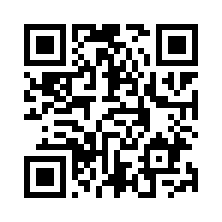